### 1. Importación de librerias utilizadas en el análisis:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Lectura de archivos CSV:

In [23]:
clientes = pd.read_csv("Clientes.csv", delimiter=";")
sucursales = pd.read_csv("Sucursales.csv", delimiter=";")
localidades = pd.read_csv("Localidades.csv", delimiter=",")
compras = pd.read_csv("Compra.csv", delimiter=",", encoding = "UTF-8")
gastos = pd.read_csv("Gasto.csv", delimiter=",")
proveedores = pd.read_csv("Proveedores.csv", delimiter=",", encoding = "cp1252")
ventas = pd.read_csv("Venta.csv", delimiter=",")
canal_venta = pd.read_excel("CanalDeVenta.xlsx")
tipo_gasto = pd.read_csv("TiposDeGasto.csv", delimiter=",")

In [49]:
clientes_delta = pd.read_csv("Clientes.csv", delimiter=";")
ventas_delta = pd.read_csv("Venta.csv", delimiter=",")

### 3. Preparación de los datos

Tabla Clientes:

In [24]:
#Eliminación de la columna "col10"
clientes = clientes.drop("col10",axis=1)

#Renombramiento de columnas X e Y
clientes.columns = ["IdCliente","Provincia","Nombre y Apellido","Direccion","Telefono","Edad","Localidad","Longitud","Latitud"]

#Cambio de orden de las columnas
clientes = clientes[["IdCliente","Nombre y Apellido","Edad","Telefono","Direccion","Localidad","Provincia","Latitud","Longitud"]]

# Eliminación/reemplazo de caracteres innecesarios 
clientes["Telefono"] = clientes["Telefono"].replace({'-':''}, regex=True)
clientes["Telefono"] = clientes["Telefono"].replace({' ':''}, regex=True)
clientes["Direccion"] = clientes["Direccion"].replace({'-':''}, regex=True)
clientes["Latitud"] = clientes["Latitud"].replace({',':'.'}, regex=True)
clientes["Longitud"] = clientes["Longitud"].replace({',':'.'}, regex=True)

#Normalizacion a Letra Capital
clientes["Nombre y Apellido"] = clientes["Nombre y Apellido"].str.title()
clientes["Direccion"] = clientes["Direccion"].str.title() 
clientes["Localidad"] = clientes["Localidad"].str.title()
clientes["Provincia"] = clientes["Provincia"].str.title()

#Imputar Valores Faltantes
clientes["Nombre y Apellido"].fillna("Sin dato", inplace=True)
clientes["Edad"].fillna("Sin dato", inplace=True)
clientes["Telefono"].fillna("Sin dato", inplace=True)
clientes["Direccion"].fillna("Sin dato", inplace=True)
clientes["Localidad"].fillna("Sin dato", inplace=True)
clientes["Provincia"].fillna("Sin dato", inplace=True)
clientes["Latitud"].fillna("Sin dato", inplace=True)
clientes["Longitud"].fillna("Sin dato", inplace=True)

#Eliminación de valores duplicados
clientes = clientes.drop_duplicates(
    subset=['IdCliente'], keep="last")
clientes = clientes.drop_duplicates(
    subset=['Nombre y Apellido'], keep="last")


clientes.isnull().sum()

IdCliente            0
Nombre y Apellido    0
Edad                 0
Telefono             0
Direccion            0
Localidad            0
Provincia            0
Latitud              0
Longitud             0
dtype: int64

In [52]:
clientes.describe()

,IdCliente,Edad
count,2314.000000,2314.000000
mean,1287.712619,40.261884
std,734.438784,14.605510
min,1.000000,15.000000
25%,666.250000,28.000000
50%,1281.500000,41.000000
75%,1894.750000,53.000000
max,2672.000000,65.000000


Tabla Sucursales:

In [12]:
#Renombramiento de columna
sucursales.columns = ["IdSucursal","Sucursal","Direccion","Localidad","Provincia","Latitud","Longitud"]

#Normalización Localidad Provincia
sucursales['Localidad']= sucursales['Localidad'].replace(["Ciudad de Buenos Aires"],"CABA")
sucursales['Localidad']= sucursales['Localidad'].replace(["Capital"],"CABA")
sucursales['Localidad']= sucursales['Localidad'].replace(["Capital Federal"],"CABA")
sucursales['Localidad']= sucursales['Localidad'].replace(["CapFed"],"CABA")
sucursales['Localidad']= sucursales['Localidad'].replace(["Cap. Fed."],"CABA")
sucursales['Localidad']= sucursales['Localidad'].replace(["Cap. Federal	"],"CABA")
sucursales['Localidad']= sucursales['Localidad'].replace(["Cap. Fed."],"CABA")
sucursales['Localidad']= sucursales['Localidad'].replace(["Cap. Federal"],"CABA")
sucursales['Localidad']= sucursales['Localidad'].replace(["Cdad de Buenos Aires"],"CABA")
sucursales['Localidad']= sucursales['Localidad'].replace(["Coroba"],"Córdoba")
sucursales['Localidad']= sucursales['Localidad'].replace(["Cordoba"],"Córdoba")

sucursales['Provincia']= sucursales['Provincia'].replace(["Ciudad de Buenos Aires"],"CABA")
sucursales['Provincia']= sucursales['Provincia'].replace(["C deBuenos Aires"],"CABA")
sucursales['Provincia']= sucursales['Provincia'].replace(["Bs As"],"CABA")
sucursales['Provincia']= sucursales['Provincia'].replace(["Bs.As."],"CABA")
sucursales['Provincia']= sucursales['Provincia'].replace(["Bs.As.	"],"CABA")
sucursales['Provincia']= sucursales['Provincia'].replace(["B. Aires"],"Buenos Aires")
sucursales['Provincia']= sucursales['Provincia'].replace(["Provincia de Buenos Aires"],"Buenos Aires")
sucursales['Provincia']= sucursales['Provincia'].replace(["Prov de Bs As."],"Buenos Aires")
sucursales['Provincia']= sucursales['Provincia'].replace(["Pcia Bs AS"],"Buenos Aires")
sucursales['Provincia']= sucursales['Provincia'].replace(["Cordoba"],"Córdoba")



Tabla compras:

In [50]:
#Imputación de valores faltantes
compras["Precio"] = compras["Precio"]
compras.isnull().sum()


IdCompra           0
Fecha              0
Fecha_Año          0
Fecha_Mes          0
Fecha_Periodo      0
IdProducto         0
Cantidad           0
Precio           367
IdProveedor        0
dtype: int64

c:\Users\Facu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cantidad'>

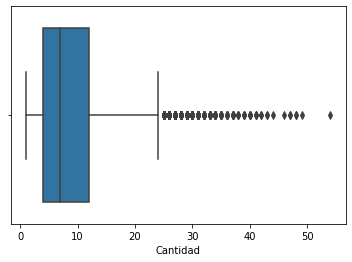

In [25]:
sns.boxplot(compras['Cantidad'])

In [19]:
compras.head(5)

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12
1,2,1/30/2015,2015,1,201501,42833,11,497.58,7
2,3,1/30/2015,2015,1,201501,42834,1,588.50,6
3,4,1/30/2015,2015,1,201501,42835,9,567.66,14
4,5,1/30/2015,2015,1,201501,42839,14,231.31,2


In [27]:
compras.describe()

,IdCompra,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
count,11539.000000,11539.000000,11539.000000,11539.000000,11539.000000,11539.000000,1.117200e+04,11539.000000
mean,5770.000000,2017.671549,4.570500,201771.725366,42900.634890,8.826415,3.613647e+03,7.533928
std,3331.166713,1.770288,3.168731,177.830326,83.539532,6.412074,1.006630e+05,3.770609
min,1.000000,2015.000000,1.000000,201501.000000,42737.000000,1.000000,1.860000e+00,1.000000
25%,2885.500000,2016.000000,1.000000,201605.000000,42832.000000,4.000000,3.068300e+02,4.000000
50%,5770.000000,2018.000000,4.000000,201801.000000,42902.000000,7.000000,4.634850e+02,8.000000
75%,8654.500000,2019.000000,7.000000,201908.000000,42973.000000,12.000000,1.260322e+03,11.000000
max,11539.000000,2020.000000,12.000000,202012.000000,43043.000000,54.000000,1.044580e+07,14.000000


In [60]:
# Z score
from scipy import stats
 
z_compras_cantidad = np.abs(stats.zscore(compras['Cantidad']))

# Cantidad de valores con desviación estandar superior a 3:

threshold = 3
 
z_compras_cantidad_err = np.where(z_compras_cantidad > 3)

np.count_nonzero(z_compras_cantidad_err, axis=None)

179

Tabla Gastos:

In [115]:
gastos.isnull().sum()

IdGasto        0
IdSucursal     0
IdTipoGasto    0
Fecha          0
Monto          0
dtype: int64

In [28]:
gastos.describe()

,IdGasto,IdSucursal,IdTipoGasto,Monto
count,8640.000000,8640.000000,8640.000000,8640.000000
mean,4320.500000,15.600000,2.500000,659.919324
std,2494.297496,8.815649,1.118099,448.630839
min,1.000000,1.000000,1.000000,100.000000
25%,2160.750000,8.000000,1.750000,255.022500
50%,4320.500000,15.500000,2.500000,679.990000
75%,6480.250000,23.000000,3.250000,1100.522500
max,8640.000000,31.000000,4.000000,1199.880000


c:\Users\Facu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monto'>

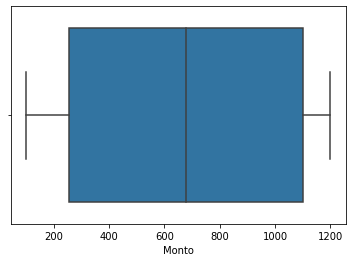

In [29]:
sns.boxplot(gastos['Monto'])

In [59]:
# Z score
 
z_gastos_monto = np.abs(stats.zscore(gastos["Monto"]))

# Cantidad de valores con desviación estandar superior a 3:

threshold = 3
 
z_gastos_monto_err = np.where(z_gastos_monto > 3)

np.count_nonzero(z_gastos_monto_err, axis=None)

0

Tabla proveedores:

In [117]:
#Eliminación de la columna departamen
proveedores = proveedores.drop("departamen",axis=1)

#Renombramiento de columnas 
proveedores.columns = ["Idproveedor","Nombre","Direccion","Localidad","Provincia","Pais"]

#Imputación de valores faltantes
proveedores["Nombre"].fillna("Sin dato", inplace=True)

#Normalizacion a Letra Capital
proveedores["Direccion"] = proveedores["Direccion"].str.title() 
proveedores["Localidad"] = proveedores["Localidad"].str.title()
proveedores["Provincia"] = proveedores["Provincia"].str.title()
proveedores["Pais"] = proveedores["Pais"].str.title()

proveedores.head(5)

,Idproveedor,Nombre,Direccion,Localidad,Provincia,Pais
0,1,Sin dato,Bereguestein 36,Avellaneda,Buenos Aires,Argentina
1,2,San Cirano,Alberti 965,Coronel Brandsen,Buenos Aires,Argentina
2,3,Bell S.A.,Moreno 331,Campana,Buenos Aires,Argentina
3,4,Rivero Insumos,Pte. Peron 3872,Valentin Alsina,Buenos Aires,Argentina
4,5,Laprida Computacion,Avda. Pedro Pereyra 1339,Laprida,Buenos Aires,Argentina


In [118]:
proveedores.isnull().sum()

Idproveedor    0
Nombre         0
Direccion      0
Localidad      0
Provincia      0
Pais           0
dtype: int64

Tabla Ventas:

In [56]:
#Imputación de valores faltantes
ventas["Precio"].fillna(0, inplace=True)
ventas["Cantidad"].fillna(0, inplace=True)

ventas.isnull().sum()

IdVenta          0
Fecha            0
Fecha_Entrega    0
IdCanal          0
IdCliente        0
IdSucursal       0
IdEmpleado       0
IdProducto       0
Precio           0
Cantidad         0
dtype: int64

In [65]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46180 entries, 0 to 46179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdVenta        46180 non-null  int64  
 1   Fecha          46180 non-null  object 
 2   Fecha_Entrega  46180 non-null  object 
 3   IdCanal        46180 non-null  int64  
 4   IdCliente      46180 non-null  int64  
 5   IdSucursal     46180 non-null  int64  
 6   IdEmpleado     46180 non-null  int64  
 7   IdProducto     46180 non-null  int64  
 8   Precio         45260 non-null  float64
 9   Cantidad       45296 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.5+ MB


In [67]:
ventas.describe()

,IdVenta,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
count,46180.000000,46180.000000,46180.000000,46180.000000,46180.000000,46180.000000,4.526000e+04,45296.000000
mean,23151.534279,2.018038,1502.635232,14.782352,2488.830858,42901.264379,5.876587e+03,2.388246
std,13432.585938,0.745254,972.536404,8.876539,960.231933,83.588487,2.510651e+05,3.562045
min,1.000000,1.000000,1.000000,1.000000,1011.000000,42737.000000,3.000000e+00,1.000000
25%,11545.750000,1.000000,691.000000,7.000000,1574.000000,42833.000000,4.380000e+02,2.000000
50%,23090.500000,2.000000,1359.000000,15.000000,2468.000000,42902.000000,6.540000e+02,2.000000
75%,34635.250000,3.000000,2273.000000,23.000000,3433.000000,42974.000000,1.789000e+03,3.000000
max,47600.000000,3.000000,3407.000000,31.000000,3979.000000,43043.000000,3.373920e+07,300.000000


In [63]:
# Z score
 
z_ventas_cant = np.abs(stats.zscore(ventas["Cantidad"]))

# Cantidad de valores con desviación estandar superior a 3:

threshold = 3
 
z_ventas_cant_err = np.where(z_ventas_cant > 3)

np.count_nonzero(z_ventas_cant_err, axis=None)

0